In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from ipywidgets import interactive, fixed
import ipywidgets as widgets
from IPython.display import display
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

In [8]:
dataset = fetch_olivetti_faces(shuffle=True, random_state=42)
faces = dataset.data

In [9]:
dataset.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [11]:
dataset['DESCR']

'.. _olivetti_faces_dataset:\n\nThe Olivetti faces dataset\n--------------------------\n\n`This dataset contains a set of face images`_ taken between April 1992 and\nApril 1994 at AT&T Laboratories Cambridge. The\n:func:`sklearn.datasets.fetch_olivetti_faces` function is the data\nfetching / caching function that downloads the data\narchive from AT&T.\n\n.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html\n\nAs described on the original website:\n\n    There are ten different images of each of 40 distinct subjects. For some\n    subjects, the images were taken at different times, varying the lighting,\n    facial expressions (open / closed eyes, smiling / not smiling) and facial\n    details (glasses / no glasses). All the images were taken against a dark\n    homogeneous background with the subjects in an upright, frontal position\n    (with tolerance for some side movement).\n\n**Data Set Characteristics:**\n\n=================   ==================

In [12]:
dataset.target

array([20, 28,  3, 21,  9,  8, 32,  9, 26, 12,  0, 36,  5,  7, 13,  4, 27,
       37, 23, 38,  7,  1, 39, 27,  0, 39, 11, 22, 26, 10, 39, 19, 26,  5,
       23, 11, 11, 34, 15, 14, 38,  5,  7,  2,  8, 38, 14, 18,  2, 17,  4,
       32, 33,  7, 37,  3, 22, 17,  3, 15, 12, 29, 25,  7, 10,  3, 35, 26,
       39,  7, 32, 14,  0,  4, 38, 24, 22, 36, 17, 28,  0,  1, 20, 25, 27,
        6, 24, 30, 10,  9, 23, 33, 11, 22, 18, 31, 37, 38, 23,  7, 24, 11,
        1,  6, 15,  0,  1, 13, 35, 34, 13, 38, 29, 38, 29,  6,  7, 28, 30,
       28, 15, 10,  1, 34,  2, 17, 35, 33, 16, 24, 31, 14, 25, 17, 11, 19,
       22, 26, 21, 30,  3, 13, 29, 15, 19, 28,  5, 11, 16, 36,  0, 33, 27,
       15,  1, 19, 10,  8, 31, 39, 37, 20, 28, 16, 35,  8, 37, 16, 14, 22,
        9,  6, 12,  9, 14, 32,  9, 23,  6,  2,  3, 14, 12, 18,  6, 19, 32,
       21, 31, 19, 12, 14, 37,  8, 33, 34, 33, 35, 33, 30, 18, 20, 28, 21,
       28, 12,  3,  1, 32, 18, 22, 11, 17, 32, 29, 11, 36, 27, 38, 28, 36,
       16, 25, 13, 15, 19

In [13]:
df=pd.DataFrame(dataset['data'])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.198347,0.235537,0.351240,0.409091,0.421488,0.429752,0.500000,0.528926,0.524793,0.553719,...,0.528926,0.508264,0.524793,0.504132,0.483471,0.471074,0.285124,0.061983,0.128099,0.090909
1,0.185950,0.128099,0.115702,0.132231,0.185950,0.268595,0.433884,0.541322,0.570248,0.586777,...,0.400826,0.396694,0.409091,0.301653,0.421488,0.462810,0.247934,0.190083,0.210744,0.210744
2,0.508264,0.603306,0.619835,0.628099,0.657025,0.665289,0.690083,0.727273,0.743802,0.768595,...,0.438017,0.301653,0.305785,0.314050,0.326446,0.338843,0.330579,0.334711,0.342975,0.342975
3,0.136364,0.140496,0.185950,0.280992,0.318182,0.363636,0.409091,0.417355,0.438017,0.454545,...,0.198347,0.169421,0.206612,0.276859,0.355372,0.685950,0.661157,0.280992,0.371901,0.276859
4,0.652893,0.644628,0.652893,0.706612,0.714876,0.719008,0.743802,0.747934,0.747934,0.756198,...,0.061983,0.074380,0.074380,0.082645,0.082645,0.111570,0.070248,0.086777,0.185950,0.231405


## Datensatz
enthält 400 Samples mit 40 Klassen, 4096 Dimensionen ($64^2$ Pixelwerte)

Überlegung: Datenkompression durch Dimesnionsreduktion, nach dem wir die PCA durchgefürt haben erwarten wir das 
unsere Daten $ < $ 6.25 MB 

In [14]:
original_size = faces.nbytes / (1024 ** 2)  # Größe in Megabyte
print(f'{original_size} MB')

6.25 MB


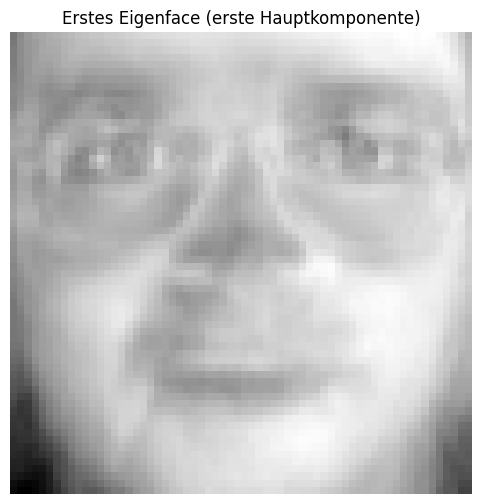

In [15]:
pca_1d = PCA(n_components=1)
faces_pca_1d = pca_1d.fit_transform(df)
first_component = pca_1d.components_[0]
eigenface = first_component.reshape(64, 64)

plt.figure(figsize=(6, 6))
plt.imshow(eigenface, cmap='gray')
plt.title('Erstes Eigenface (erste Hauptkomponente)')
plt.axis('off')
plt.show()

In [16]:
# Get the principal components
components = pca_1d.components_

# Create a DataFrame to see which features contribute to which principal component
# The DataFrame index corresponds to the principal components
# The columns correspond to the features
df_components = pd.DataFrame(components)

# Display the contribution of each feature to the first two components
print("Contribution of features to the first principal component:")
print(df_components.iloc[0].sort_values(ascending=False))

Contribution of features to the first principal component:
54      0.024313
57      0.024203
55      0.024161
119     0.024006
58      0.023981
          ...   
3971   -0.011903
4035   -0.012151
3970   -0.012207
4033   -0.012904
4034   -0.013082
Name: 0, Length: 4096, dtype: float32


Die Anzahl der Hauptkomponenten, die 95% der Varianz erklären, ist: 123


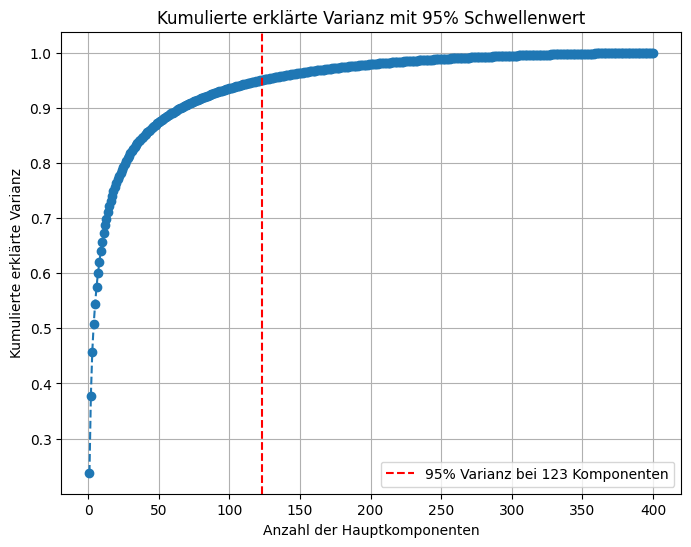

In [17]:
# PCA ohne Angabe der Anzahl der Komponenten
pca = PCA()
pca.fit(faces)
# Erklärte Varianz und kumulierte erklärte Varianz berechnen
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

# Anzahl der Komponenten für 95% der Varianz
threshold = 0.95
num_components = np.argmax(cumulative_explained_variance >= threshold) + 1

print(f'Die Anzahl der Hauptkomponenten, die 95% der Varianz erklären, ist: {num_components}')

# Plot mit dem identifizierten Punkt für 95% der Varianz
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axvline(x=num_components, color='r', linestyle='--', label=f'95% Varianz bei {num_components} Komponenten')
plt.xlabel('Anzahl der Hauptkomponenten')
plt.ylabel('Kumulierte erklärte Varianz')
plt.title('Kumulierte erklärte Varianz mit 95% Schwellenwert')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
pca = PCA(n_components=num_components, whiten=True)
faces_pca = pca.fit_transform(faces)
compressed_size = (faces_pca.nbytes + pca.components_.nbytes) / (1024 ** 2)  # Größe in Megabyte

In [19]:
compressed_size, num_components

(2.10955810546875, 123)

## Mathematische Erklärung der Inverse-Transformation

Die Inverse-Transformation in der Hauptkomponentenanalyse (PCA) ist der Prozess, durch den die reduzierten Daten wieder in den ursprünglichen Merkmalsraum zurücktransformiert werden. Dies ermöglicht es uns, eine Annäherung des ursprünglichen Datensatzes zu rekonstruieren, wobei nur die Hauptkomponenten verwendet werden.

### 1. **PCA-Transformation**

Die PCA-Transformation kann mathematisch dargestellt werden als:

$$
X_{\text{PCA}} = X \cdot W
$$

wobei:

- $ X $ die ursprünglichen Daten (z.B. das Bild) sind.
- $ W $ die Matrix der Eigenvektoren (die Hauptkomponenten) ist.
- $ X_{\text{PCA}}$) die projizierten Daten im Hauptkomponentenraum sind.

### 2. **Inverse-Transformation**

Um die ursprünglichen Daten $ X $ aus den projizierten Daten $ X_{\text{PCA}} $ wiederherzustellen, verwenden wir die Inverse-Transformation:

$$
X_{\text{rekonstruiert}} = X_{\text{PCA}} \cdot W^T + \mu
$$

wobei:

- $ W^T $ die Transponierte der Matrix der Eigenvektoren ist.
- $ X_{\text{rekonstruiert}} $ die rekonstruierten Daten im ursprünglichen Merkmalsraum sind.

### 3. **Interpretation**

Die rekonstruierten Daten $ X_{\text{rekonstruiert}} $ sind eine Annäherung an die ursprünglichen Daten $ X $. Da bei der PCA nur die wichtigsten Hauptkomponenten (d.h. diejenigen mit den höchsten Eigenwerten) beibehalten werden, verlieren wir einige Informationen. Dies führt dazu, dass das rekonstruierte Bild typischerweise eine glattere und weniger detaillierte Version des Originalbildes ist.

### 4. **Visuelle Darstellung**

Durch die visuelle Darstellung des Original- und des rekonstruierten Bildes nebeneinander kannst du sehen, wie viel Information bei der Dimensionenreduktion verloren geht und wie gut die Rekonstruktion funktioniert.


Unsere Daten liegen nun komprimiert vor: 
- Zuvor 6.25 MB und 4096 Dimensionen und 2.11 MB und 123 

Können wir ein Bild wieder rekonstruieren?

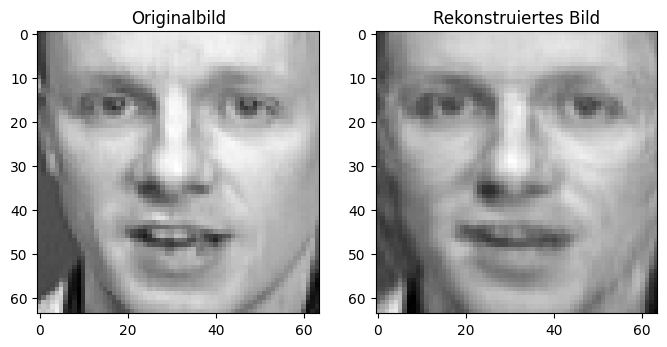

Original shape: (4096,)
Compressed shape: (4096,)


In [20]:
# Ein Bild komprimieren und rekonstruieren
face_idx = 0  # Index des zu komprimierenden Bildes
original_face = faces[face_idx]
compressed_face = pca.inverse_transform(faces_pca[face_idx].reshape(1, -1)).reshape(-1)

# Original und rekonstruierte Bilder anzeigen
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].imshow(original_face.reshape((64, 64)), cmap='gray')
ax[0].set_title('Originalbild')

ax[1].imshow(compressed_face.reshape((64, 64)), cmap='gray')
ax[1].set_title('Rekonstruiertes Bild')

plt.show()

# Überprüfe die Dimensionen
print("Original shape:", original_face.shape)
print("Compressed shape:", compressed_face.shape)

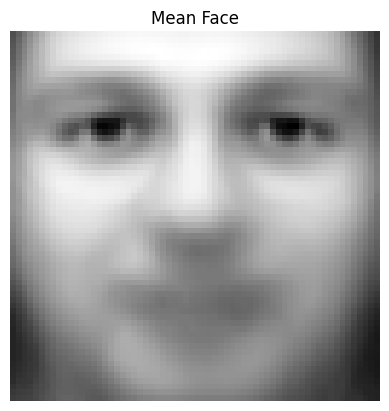

In [21]:
# Mean Face berechnen
mean_face = np.mean(faces, axis=0)

# Mean Face anzeigen
plt.imshow(mean_face.reshape(64,64), cmap='gray')
plt.title("Mean Face")
plt.axis('off')
plt.show()

## Part II

In [22]:
labels = dataset.target
n_samples, n_features = faces.shape

In [23]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(faces_pca, labels, test_size=0.2, random_state=42)

In [24]:
# Klassifikation im Hauptachsenraum
def classify_face(face_pca, X_train_pca, y_train):
    distances = np.linalg.norm(X_train_pca - face_pca, axis=1)
    return y_train[np.argmin(distances)]

In [25]:
# Vorhersagen für die Testdaten treffen
y_pred = [classify_face(face, X_train_pca, y_train) for face in X_test_pca]

In [26]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Genauigkeit der Gesichtserkennung: {accuracy:.2f}')

Genauigkeit der Gesichtserkennung: 0.80


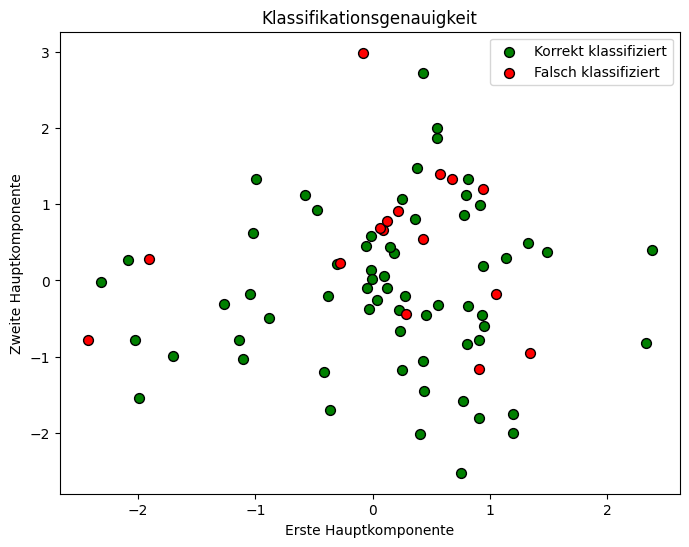

In [27]:
plt.figure(figsize=(8,6))

# Korrekt klassifizierte Punkte
correct = y_test == y_pred
plt.scatter(X_test_pca[correct, 0], X_test_pca[correct, 1], c='green', label='Korrekt klassifiziert', edgecolor='k', s=50)

# Falsch klassifizierte Punkte
incorrect = ~correct
plt.scatter(X_test_pca[incorrect, 0], X_test_pca[incorrect, 1], c='red', label='Falsch klassifiziert', edgecolor='k', s=50)

plt.title("Klassifikationsgenauigkeit")
plt.xlabel("Erste Hauptkomponente")
plt.ylabel("Zweite Hauptkomponente")
plt.legend()
plt.show()